In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
options(repr.matrix.max.rows = 6)
library(dplyr)



Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

# Group 18: How does height, ranking point and game duration relates to the age of right-handed tennis player in 2018

# Introduction:

### The Dataset:
Our project uses the dataset "atp_matches_2018.csv". It is a dataset that describes the game results of a specific tournament. The dataset provides a detailed insight of all statistics relating to that particular match.

### About Our Project:
In professional tennis, players exhibit a wide range of skills and strategies that contribute to their success on the court. Among these factors, some of the significant aspects of a player's game are their preferred hand and their physical data. In our project, we will be focused primarily on predicting the age of a player based on ranking points, height and game duration. Being able to make connections and prediction of age through these predictors allows us to further rationalize the relationships, and provide the public a biref understanding of whether age would affect the performance of tennis athelets. 



### Our Project Question:
Our project will investigate how the game duration, rank points and height of tennis players correlate with the age of right-handed players. 


# Preliminary exploratory data analysis:


### Data reading

In [19]:
url <- "https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2018.csv"
player_stats <- read_csv(url)
player_stats
print("Table 1. A preview of the 2018 Tennis Player statistic")

Rows: 2897 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tourney_id, tourney_name, surface, tourney_level, winner_entry, wi...
dbl (35): draw_size, tourney_date, match_num, winner_id, winner_seed, winner...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-M020,Brisbane,Hard,32,A,20180101,271,105992,NA,NA,⋯,47,33,19,14,1,4,47,1010,52,909
2018-M020,Brisbane,Hard,32,A,20180101,272,111577,NA,NA,⋯,41,25,7,9,7,11,54,890,94,593
2018-M020,Brisbane,Hard,32,A,20180101,273,104797,NA,NA,⋯,53,37,29,15,10,16,63,809,30,1391
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2018-9210,Laver Cup,Hard,8,A,20180921,106,103819,NA,NA,⋯,NA,NA,NA,NA,NA,NA,2,6900,27,1425
2018-9210,Laver Cup,Hard,8,A,20180921,107,104731,NA,NA,⋯,NA,NA,NA,NA,NA,NA,9,3595,3,6445
2018-9210,Laver Cup,Hard,8,A,20180921,108,105777,NA,NA,⋯,NA,NA,NA,NA,NA,NA,7,3755,40,1090


[1] "Table 1. A preview of the 2018 Tennis Player statistic"


### Data cleaning
 

In [20]:
player_stats_righthanded <- filter (player_stats, grepl('R', winner_hand))
player_stats_righthanded
print("Table 2. A preview of right-handed players")

tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-M020,Brisbane,Hard,32,A,20180101,271,105992,NA,NA,⋯,47,33,19,14,1,4,47,1010,52,909
2018-M020,Brisbane,Hard,32,A,20180101,272,111577,NA,NA,⋯,41,25,7,9,7,11,54,890,94,593
2018-M020,Brisbane,Hard,32,A,20180101,273,104797,NA,NA,⋯,53,37,29,15,10,16,63,809,30,1391
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2018-9210,Laver Cup,Hard,8,A,20180921,106,103819,NA,NA,⋯,NA,NA,NA,NA,NA,NA,2,6900,27,1425
2018-9210,Laver Cup,Hard,8,A,20180921,107,104731,NA,NA,⋯,NA,NA,NA,NA,NA,NA,9,3595,3,6445
2018-9210,Laver Cup,Hard,8,A,20180921,108,105777,NA,NA,⋯,NA,NA,NA,NA,NA,NA,7,3755,40,1090


[1] "Table 2. A preview of right-handed players"


In [21]:
player_stats_with_predictor <- select (player_stats_righthanded, winner_rank_points, winner_ht, winner_age, minutes) |>
                         drop_na()

player_stats_with_predictor
print("Table 3. A preview of the cleaned dataset with the predictors")

winner_rank_points,winner_ht,winner_age,minutes
<dbl>,<dbl>,<dbl>,<dbl>
1010,183,25.6,123
890,188,21.2,90
809,188,31.3,145
⋮,⋮,⋮,⋮
2480,188,22.0,139
4250,198,30.1,142
4250,198,30.1,139


[1] "Table 3. A preview of the cleaned dataset with the predictors"


### Choosing Age Category 

[1] "Table 4. Winner's Age VS Ranking Points Gragh"


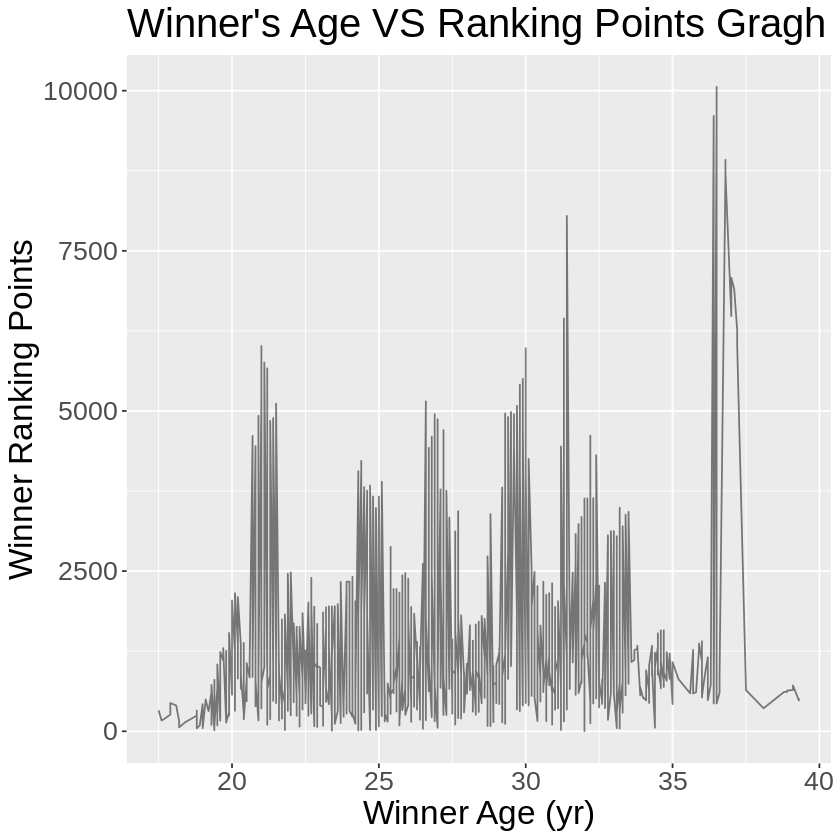

In [22]:
draft_plot <- ggplot (player_stats_with_predictor, aes(x = winner_age, y = winner_rank_points)) +
                    geom_line(alpha = 0.5) +
                    xlab("Winner Age (yr)") +
                    ylab("Winner Ranking Points") +
                    ggtitle("Winner's Age VS Ranking Points Gragh") +
                    theme(text = element_text(size = 20))
draft_plot
print("Table 4. Winner's Age VS Ranking Points Gragh")

In this step, we create a graph of winner age versus ranking points to establish an age threshold for categorization. The graph reveals a distinct rise in ranking points around age 36. However, the 36 peak is not supported by enough data points, as most of the data are gathered bewteen 20-35. Therefore, we decided to take the largest rise in ranking points between 20-35 instead, which is around 31. As a result, we define the age category range as "young" for ages 0-30 and "old" for 31 or above.


In [24]:
stats_with_category <- player_stats_with_predictor |> 
                       mutate(age_category = ifelse(winner_age < 31, "young", "old"))|>
                       mutate(age_category = factor(age_category, levels=c("young","old")))
stats_with_category
print("Table 5. A preview of the cleaned dataset with age category")

winner_rank_points,winner_ht,winner_age,minutes,age_category
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1010,183,25.6,123,young
890,188,21.2,90,young
809,188,31.3,145,old
⋮,⋮,⋮,⋮,⋮
2480,188,22.0,139,young
4250,198,30.1,142,young
4250,198,30.1,139,young


[1] "Table 5. A preview of the cleaned dataset with age category"


### Data Splitting

Before performing primilinary analysis, we would like to split the clean dataset into training data and testing data using the 75:25 ratio. This will help prevent data overfitting and allows for impartial parameter tuning.


In [26]:
set.seed(99)

player_split <- initial_split(stats_with_category, prop=0.75, strata=winner_age)
player_training <- training(player_split)
player_testing <- testing(player_split)

head(player_training)
print("Table 3. A preview of the training set")

winner_rank_points,winner_ht,winner_age,minutes,age_category
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
245,183,18.8,104,young
844,188,21.6,99,young
992,188,22.9,150,young
245,183,18.8,94,young
299,188,19.9,152,young
2010,193,22.6,132,young


[1] "Table 3. A preview of the training set"


### Creating Plots with Predictors to Briefly Understand the Relationship

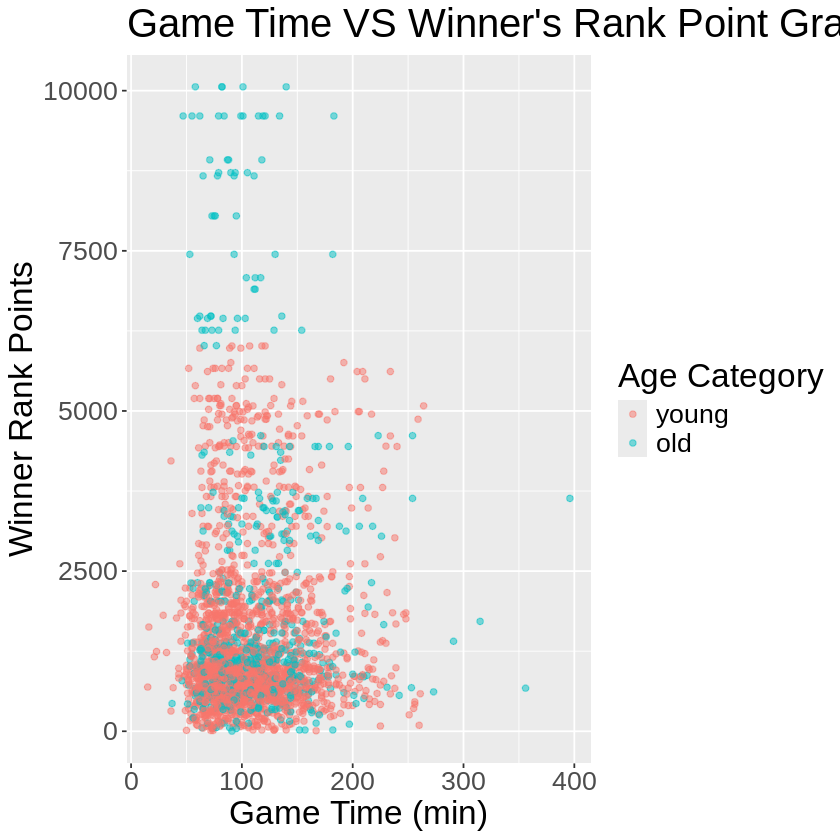

In [15]:
Time_Rank_plot <- ggplot (stats_with_category, aes(x = minutes, y = winner_rank_points)) +
                    geom_point(alpha = 0.5, aes(color = age_category)) +
                    xlab("Game Time (min)") +
                    ylab("Winner Rank Points") +
                    labs(colour = "Age Category") +
                    ggtitle("Game Time VS Winner's Rank Point Gragh") +
                    theme(text = element_text(size = 20))
Time_Rank_plot

The graph shows older players tend to have higher rank points (blue points in upper left-middle), while younger players tend to have lower rank points (red points in bottom left-middle), possibly due to older players' better skills and experience. Game duration for young players mostly falls within 50-200 minutes, while for older players, it spans 50-250 minutes, possibly reflecting differences in physical health and reaction time.

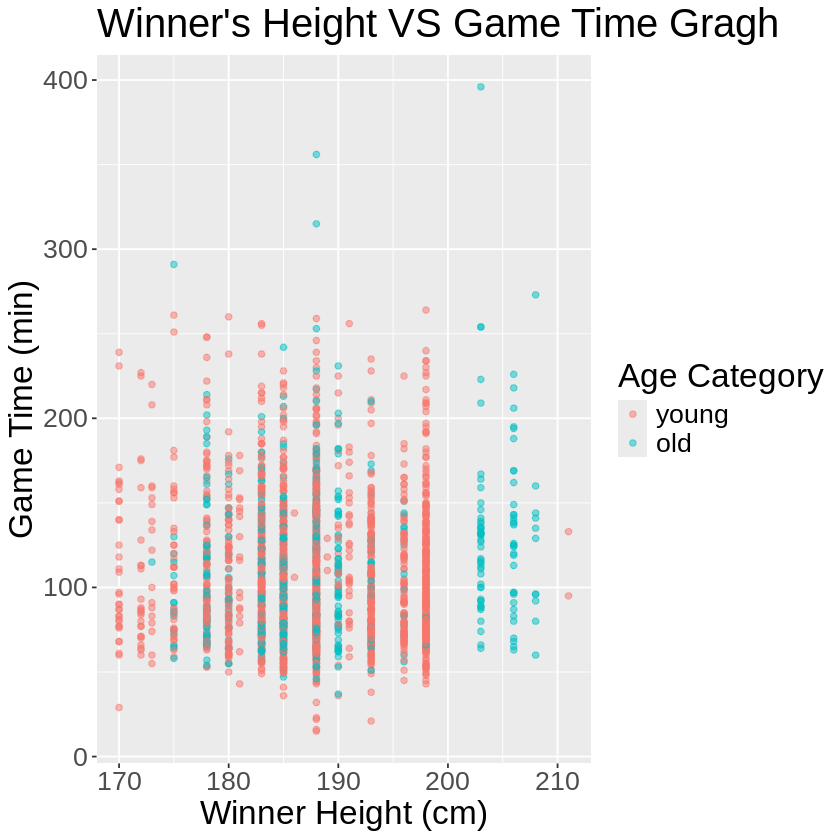

In [16]:
Height_Rank_plot <- ggplot (stats_with_category, aes(x = winner_ht, y = minutes)) +
                    geom_point(alpha = 0.5, aes(color = age_category)) +
                    xlab("Winner Height (cm)") +
                    ylab("Game Time (min)") +
                    labs(colour = "Age Category") +
                    ggtitle("Winner's Height VS Game Time Gragh") +
                    theme(text = element_text(size = 20))
Height_Rank_plot

In the Game Time versus Winner Height Graph, red points cluster towards the left and middle sections, while blue points concentrate towards the right and middle sections. This indicates that younger players generally have slightly lower heights compared to older players, possibly due to ongoing growth among players around 20 years old, whose recorded height may not be permanent at the time of data collection.


Upon analyzing the predictors' relationship with age, it's evident that height, game time, and rank points could serve as potential predictors for estimating the age of players, as they exhibit significant associations.

# Methods

We will choose the winner's height, rank points, and game time to be our main predictors to predict the age of players. 


### Data Processing:
Initially, we filter right-handed players and retain only the predictor columns along with the age column. This streamlines the data, ensuring it remains clean and focused on pertinent information.

### Exploratory Data Analysis:
Subsequently, we categorize the numerical values of age to facilitate classification. We then introduce a new column representing age categories, which will aid in color-coding the plot.

### Data Transformation:
Remove NA

### Model Selection and Training:
Using cross-validation, we will fine-tune model parameters and validate the model's efficacy, ensuring its performance.

### Prediction:
We will perform statistical summaries and visual explorations of the selected variables to understand their distributions, outliers, and thus using classification to predict the age of players. 

### Visualize results: 
To visualize the results, we'll use a scatter plot to juxtapose the predicted age against the actual age, allowing us to assess the accuracy of the prediction model visually. This scatter plot will provide a clear depiction of how closely the predicted ages align with the true ages of the players in our dataset.



# Expected outcomes and significance:

### What do you expect to find?
We expect to accurately predict player’s age based on the the predator height, game time and rank points.

### What impact could such findings have?
These findings offer insights into the role of age in tennis performance and whether it impacts players' abilities. By focusing on right-handed players, who form the majority, we aim to determine if age affects their advantage in professional tennis careers. Ultimately, these insights can help players assess their competitive edge in the professional tennis arena.

### What future questions could this lead to?
- Can we use height to predict rankings of left-handed players?
- If height is a predictor, can weight also affect a player's ranking? (as they combined to perform calculations of BMI)
- Depending on the relationship seen, will these results affect a new player's interest in pursueing a professional career?